# Modelling

## Initiate

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import OrdinalEncoder as OE
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNC
from mixed_naive_bayes import MixedNB as MNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline as PL

from xgboost import XGBClassifier as XGB
from category_encoders.target_encoder import TargetEncoder as TE
from category_encoders.wrapper import PolynomialWrapper as PW

from catboost import CatBoostClassifier as CBC

from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix as PCM

from datetime import datetime as DT
import pickle

import matplotlib.pyplot as plt

In [38]:
le = LE()
data = pd.read_csv('data/cleaned.csv')
X = data.drop('status_group', axis=1)
X.drop(col_drop, axis=1, inplace=True)
y = le.fit_transform(data.status_group)

In [50]:
def run_model(model, X=X, cv=3):
    results = {}
    gscv = GSCV(model['model'], model['grid'], cv=cv, n_jobs=-1, scoring='accuracy')
    X_train, X_test, y_train, y_test = TTS(X, y, random_state=22)
    t1 = DT.now()
    gscv.fit(X_train, y_train)
    print('fitted')
    t2 = DT.now()
    results['train_time'] = t2 - t1
    
    t1 = DT.now()
    y_hat_train = gscv.predict(X_train)
    t2 = DT.now()
    print('pred1')
    
    train = {}
    train['predict_time'] = t2 - t1
    print('predt')
    train['acc_train'] = accuracy_score(y_train, y_hat_train)
    print('acc')
    train['prec_train'] = precision_score(y_train, y_hat_train, average='micro')
    print('prec')
    train['recall_train'] = recall_score(y_train, y_hat_train, average='micro')
    print('rec')
    train['f1_train'] = f1_score(y_train, y_hat_train, average='micro')
    print('f1')
    
    print(model['name'], 'train classification report\n', 
          classification_report(y_train, y_hat_train))
    PCM(gscv, X_train, y_train, normalize='true', cmap='Blues')
    
    results['train'] = train
    
    t1 = DT.now()
    y_hat_test = gscv.predict(X_test)
    t2 = DT.now()
    print('pred2')
    
    test = {}
    test['predict_time'] = t2 - t1
    test['acc_test'] = accuracy_score(y_test, y_hat_test)
    test['prec_test'] = precision_score(y_test, y_hat_test, average='micro')
    test['recall_test'] = recall_score(y_test, y_hat_test, average='micro')
    test['f1_test'] = f1_score(y_test, y_hat_test, average='micro')
    
    print(model['name'], 'test classification report\n', 
          classification_report(y_test, y_hat_test))
    PCM(gscv, X_test, y_test, normalize='true', cmap='Blues')
    print('Best Params:\n', gscv.best_params_)
    
    results['test'] = test
    
    return gscv, results

In [9]:
def pickle_save(item, name):
    with open(name + '.pickle', 'wb') as f:
        pickle.dump(item, f, pickle.HIGHEST_PROTOCOL)
        
def pickle_load(name):
    with open(name + '.pickle', 'rb') as f:
        return pickle.load(f)


#### From EDA:

In [51]:
# columns to potentially drop
col_drop = ['extraction_type_class', 'extraction_type_group', 'management_group',
            'scheme_management','scheme_name', 'payment', 'quality_group', 
            'quantity_group', 'source_class', 'source_type',
            'waterpoint_type_group', 'wpt_name', 'amount_tsh']

In [52]:
#Keep the first z categories of each categorical feature, replace the rest with 'other'
def group(df, z=10):
    keep = {}
    for col in df.select_dtypes(object):
        a = df[col].value_counts()
        c = len(a)
        if c > z:
            keep[col] = a.index[:z]
            df.loc[:,col] = df.apply(lambda x: x[col] if x[col] in keep[col] 
                                     else 'other', axis=1)
    return df

Feature category options:   
- Raw
- Cleaned
- (group function) keep the most common: 500, 200, 100, 50, 20 categories
- Above features dropped
- Target Encoder

Balance options:
- Do nothing
- SMOTE
- weight balancing within algorithms

Other options:
- standard scaler?

## Models

fitted
pred1
predt
acc
prec
rec
f1


C:\Users\Maltanno\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maltanno\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maltanno\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


testdt train classification report
               precision    recall  f1-score   support

           0       0.65      0.97      0.78     24272
           1       0.00      0.00      0.00      3226
           2       0.87      0.43      0.58     17052

    accuracy                           0.69     44550
   macro avg       0.51      0.47      0.45     44550
weighted avg       0.69      0.69      0.65     44550

pred2
testdt test classification report
               precision    recall  f1-score   support

           0       0.65      0.97      0.77      7987
           1       0.00      0.00      0.00      1091
           2       0.88      0.44      0.59      5772

    accuracy                           0.69     14850
   macro avg       0.51      0.47      0.45     14850
weighted avg       0.69      0.69      0.64     14850



C:\Users\Maltanno\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maltanno\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maltanno\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Params:
 {}


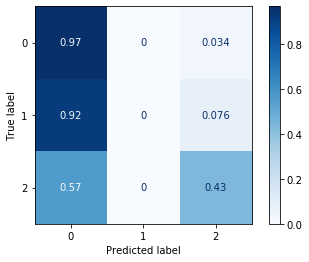

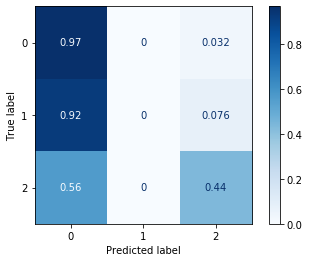

In [69]:
#Test model
pldt = PL([('te', PW(TE())),
         ('dtc', DTC(max_depth=2))
         ])
test = {'name' : 'testdt',
      'model' : pldt,
      'grid' : {}
       }

Xa = group(X, z=5)
result = run_model(test, X)
result[1]

The parameters in the grid have been narrowed down to their current values from a wider range

### Logistic Regression

In [8]:
#Logistic Regression
pllr = PL([('ohe', OHE(handle_unknown='ignore')),
          ('lr', LR(random_state=22, n_jobs=-1))
          ])

pllrss = PL([('ohe', OHE(handle_unknown='ignore')),
            ('ss', SS(with_mean=False)),
            ('lr', LR(random_state=22, n_jobs=-1))])

lr_grid = {'lr__penalty' : ['l1'],
           'lr__C' : [1, 1e4, 1e10],
           'lr__class_weight' : [None],
           'lr__solver' : ['saga'],
           'lr__multi_class' : ['multinomial'],
}

lr = {'name' : 'lr',
      'model' : pllr,
      'grid' : lr_grid     
     }
lrss = {'name' : 'lrss',
      'model' : pllrss,
      'grid' : lr_grid     
     }

In [ ]:
lr_result = run_model(lr, X=group(X, 5))
pickle_save(lr_result, 'lr')

In [ ]:
lrss_result = run_model(lrss, X=group(X, 5))
pickle_save(lrss_result, 'lrss')

### K Nearest Neighbors

In [20]:
#KNN
plknc = PL([('ohe', OHE()),
            ('knc', KNC(n_jobs=-1))
           ])

plkncss = PL([('ohe', OHE()),
            ('ss', SS(with_mean=False)),
            ('knc', KNC())
           ])
knc_grid = {'knc__n_neighbors' : [8],
            'knc__weights' : ['distance'],
            'knc__p' : [1],
           }
#Note for a non-OHE (non-sparse) pipeline, may want to add 'leaf_size' parameter

knc = {'name' : 'knc',
      'model' : plknc,
      'grid' : knc_grid     
     }
kncss = {'name' : 'kncss',
      'model' : plkncss,
      'grid' : knc_grid     
     }

fitted
pred1
predt
acc
prec
rec
f1
knc train classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24272
           1       1.00      0.99      0.99      3226
           2       1.00      1.00      1.00     17052

    accuracy                           1.00     44550
   macro avg       1.00      1.00      1.00     44550
weighted avg       1.00      1.00      1.00     44550

pred2
knc test classification report
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      7987
           1       0.47      0.27      0.34      1091
           2       0.68      0.63      0.65      5772

    accuracy                           0.69     14850
   macro avg       0.62      0.56      0.58     14850
weighted avg       0.68      0.69      0.68     14850

Best Params:
 {'knc__n_neighbors': 8, 'knc__p': 1, 'knc__weights': 'distance'}


(GridSearchCV(cv=3,
              estimator=Pipeline(steps=[('te',
                                         PolynomialWrapper(feature_encoder=TargetEncoder())),
                                        ('knc',
                                         KNeighborsClassifier(n_jobs=-1))]),
              n_jobs=-1,
              param_grid={'knc__n_neighbors': [6, 7, 8], 'knc__p': [1],
                          'knc__weights': ['distance']},
              scoring='accuracy'),
 {'train_time': datetime.timedelta(0, 201, 785699),
  'train': {'predict_time': datetime.timedelta(0, 237, 353255),
   'acc_train': 0.9986307519640854,
   'prec_train': 0.9986307519640854,
   'recall_train': 0.9986307519640854,
   'f1_train': 0.9986307519640854},
  'test': {'predict_time': datetime.timedelta(0, 80, 733098),
   'acc_test': 0.6886868686868687,
   'prec_test': 0.6886868686868687,
   'recall_test': 0.6886868686868687,
   'f1_test': 0.6886868686868687}})

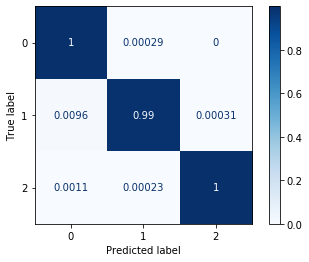

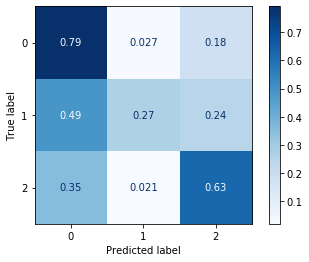

In [81]:
knc_result = run_model(knc, X=group(X))
pickle_save(knc_result, 'knc')
knc_result

In [ ]:
kncss_result = run_model(kncss, X=group(X))
pickle_save(kncss_result, 'kncss')
kncss_result

### Naive Bayes

In [25]:
#Naive Bayes, mixed
Xd = X.copy()
cat = Xd.select_dtypes('object').columns
cont = Xd.drop(cat, axis=1).columns
plmnb = PL([('oe', OE(handle_unknown='use_encoded_value', unknown_value=0)),
            ('mnb', MNB(categorical_features=[0, 2, 6, 7, 8, 11, 12, 14, 15, 
                                              16, 17, 18, 19, 20, 21, 22, 26]))
           ])
oe = OE()
Xnb = pd.DataFrame(oe.fit_transform(Xd[cat]))
Xnb = pd.concat([Xnb, Xd[cont]], axis=1)

In [ ]:
#for alpha in [250, 275, 300, 325, 350]:
#for vs in [1e2, 1e3, 1e4]:

#best results found for:
alpha = 275
vs = 100

result = {}
mnb = MNB(categorical_features=range(17), alpha=alpha, var_smoothing=vs)
X_train, X_test, y_train, y_test = TTS(Xnb, y, random_state=22)
t1 = DT.now()
mnb.fit(X_train, y_train)
print('fitted')
t2 = DT.now()
result['train_time'] = t2 - t1

t1 = DT.now()
y_hat_train = mnb.predict(X_train)
t2 = DT.now()
print('pred1')

train = {}
train['predict_time'] = t2 - t1
#print('predt')
train['acc_train'] = accuracy_score(y_train, y_hat_train)
#print('acc')
train['prec_train'] = precision_score(y_train, y_hat_train, average='micro')
#print('prec')
train['recall_train'] = recall_score(y_train, y_hat_train, average='micro')
#print('rec')
train['f1_train'] = f1_score(y_train, y_hat_train, average='micro')
#print('f1')

print(alpha, vs, train['acc_train'])
print(alpha, vs, 'train classification report\n', 
      classification_report(y_train, y_hat_train))

result['train'] = train

t1 = DT.now()
y_hat_test = mnb.predict(X_test)
t2 = DT.now()
print('pred2')

test = {}
test['predict_time'] = t2 - t1
test['acc_test'] = accuracy_score(y_test, y_hat_test)
test['prec_test'] = precision_score(y_test, y_hat_test, average='micro')
test['recall_test'] = recall_score(y_test, y_hat_test, average='micro')
test['f1_test'] = f1_score(y_test, y_hat_test, average='micro')

print(alpha, vs, test['acc_test'])
print(alpha, vs, 'test classification report\n', 
      classification_report(y_test, y_hat_test))

result['test'] = test

mnb_result = (mnb, result)

In [52]:
pickle_save(mnb_result, 'mnb')

### Decision Tree

In [ ]:
#Decision Tree
pldtc = PL([('te', PW(TE())),
         ('dtc', DTC(random_state=22))
         ])
dtc_grid = {'dtc__criterion' : ['gini'],
            'dtc__max_depth' : [10, 15, 20, 25],
            'dtc__min_samples_leaf' : [1],
            'dtc__class_weight' : [None]
            }
dtc = {'name' : 'dtc',
      'model' : pldtc,
      'grid' : dtc_grid
      }
#previous best params:
# {'dtc__class_weight': None, 'dtc__criterion': 'gini', 'dtc__max_depth': 15, 
#  'dtc__min_samples_leaf': 1}


In [ ]:
dtc_result = run_model(dtc, X)
dtc_result

In [ ]:
pickle_save(dtc_result, 'dtc')

### Random Forest

In [ ]:
#Random Forest
plrf = PL([('te', PW(TE())),
         ('rf', RFC(random_state=22, n_jobs=-1, oob_score=True))
         ])
rf_grid = {'rf__n_estimators' : [80],
           'rf__criterion' : ['entropy'],
           'rf__max_depth' : [40],
           'rf__min_samples_leaf' : [1],
           'rf__max_features' : ['sqrt'],
           'rf__class_weight' : ['balanced'],
           'rf__max_samples' : [0.7]
            }
rf = {'name' : 'rf',
      'model' : plrf,
      'grid' : rf_grid
      }
#previous best params:
#{'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 15, 
# 'rf__max_features': 'sqrt', 'rf__max_samples': 0.6, 
# 'rf__min_samples_leaf': 1, 'rf__n_estimators': 100}



In [ ]:
rf_result = run_model(rf, X)
rf_result

In [ ]:
pickle_save(rf_result, 'rf')

### Adaboost

In [87]:
plab = PL([('te', PW(TE())),
         ('ab', ABC(random_state=22))
         ])
ab_grid = {'ab__n_estimators' : [500],
           'ab__learning_rate' : [0.8]
           #'ab__base_estimator' : [None, dtc]
            }
ab = {'name' : 'ab',
      'model' : plab,
      'grid' : ab_grid
      }

fitted
pred1
predt
acc
prec
rec
f1
ab train classification report
               precision    recall  f1-score   support

           0       0.73      0.89      0.80     24272
           1       0.51      0.11      0.18      3226
           2       0.79      0.64      0.71     17052

    accuracy                           0.74     44550
   macro avg       0.68      0.55      0.56     44550
weighted avg       0.73      0.74      0.72     44550

pred2
ab test classification report
               precision    recall  f1-score   support

           0       0.72      0.89      0.80      7987
           1       0.54      0.12      0.19      1091
           2       0.79      0.64      0.71      5772

    accuracy                           0.74     14850
   macro avg       0.68      0.55      0.56     14850
weighted avg       0.73      0.74      0.72     14850

Best Params:
 {'ab__learning_rate': 0.8, 'ab__n_estimators': 500}


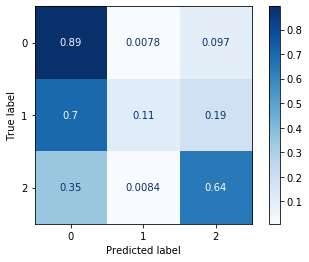

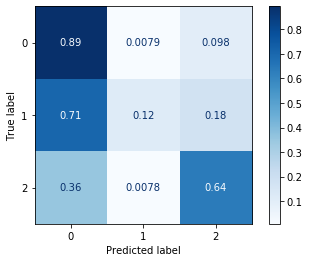

In [88]:
ab_result = run_model(ab, X)
ab_result

In [60]:
pickle_save(ab_result, 'ab')

### Gradient Boosting

In [ ]:
plgb = PL([('ohe', OHE(handle_unknown='ignore')),
         ('gb', GBC(random_state=22))
         ])
plgbte = PL([('te', PW(TE())),
         ('gb', GBC(random_state=22))
         ])
gb_grid = {'gb__loss' : ['deviance'],
           'gb__n_estimators' : [300],
           'gb__learning_rate' : [0.1],
           'gb__subsample' : [0.5],
           'gb__max_depth' : [80],
           'gb__min_samples_leaf' : [1]
#            'gb__init' : ['dtc', None]
            }
gb = {'name' : 'gb',
      'model' : plgb,
      'grid' : gb_grid
      }

fitted
pred1
predt
acc
prec
rec
f1
gb train classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24272
           1       0.99      0.99      0.99      3226
           2       1.00      1.00      1.00     17052

    accuracy                           1.00     44550
   macro avg       1.00      1.00      1.00     44550
weighted avg       1.00      1.00      1.00     44550

pred2
gb test classification report
               precision    recall  f1-score   support

           0       0.79      0.91      0.84      7987
           1       0.64      0.29      0.40      1091
           2       0.85      0.76      0.80      5772

    accuracy                           0.80     14850
   macro avg       0.76      0.65      0.68     14850
weighted avg       0.80      0.80      0.79     14850

Best Params:
 {'gb__learning_rate': 0.1, 'gb__loss': 'deviance', 'gb__max_depth': 40, 'gb__min_samples_leaf': 1, 'gb__n_estimators': 5

(GridSearchCV(cv=3,
              estimator=Pipeline(steps=[('ohe',
                                         OneHotEncoder(handle_unknown='ignore')),
                                        ('gb',
                                         GradientBoostingClassifier(random_state=22))]),
              n_jobs=-1,
              param_grid={'gb__learning_rate': [0.1], 'gb__loss': ['deviance'],
                          'gb__max_depth': [20, 40, 80],
                          'gb__min_samples_leaf': [1],
                          'gb__n_estimators': [200, 300, 500],
                          'gb__subsample': [0.5, 0.7]},
              scoring='accuracy'),
 {'train_time': datetime.timedelta(0, 45729, 401247),
  'train': {'predict_time': datetime.timedelta(0, 67, 236190),
   'acc_train': 0.9986307519640854,
   'prec_train': 0.9986307519640854,
   'recall_train': 0.9986307519640854,
   'f1_train': 0.9986307519640854},
  'test': {'predict_time': datetime.timedelta(0, 29, 582840),
   'acc_test': 0

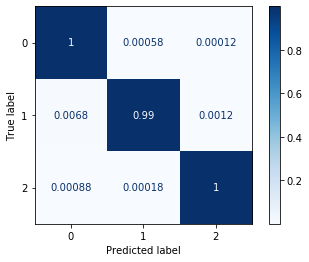

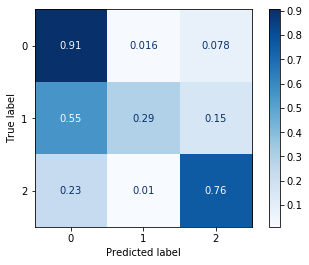

In [90]:
gb_results = run_model(gb, X=group(X, z=5))
gb_results

In [95]:
pickle_save(gb_results, 'gb')

fitted
pred1
predt
acc
prec
rec
f1
gbte train classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24272
           1       1.00      0.99      0.99      3226
           2       1.00      1.00      1.00     17052

    accuracy                           1.00     44550
   macro avg       1.00      1.00      1.00     44550
weighted avg       1.00      1.00      1.00     44550

pred2
gbte test classification report
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      7987
           1       0.61      0.34      0.44      1091
           2       0.84      0.79      0.81      5772

    accuracy                           0.81     14850
   macro avg       0.75      0.67      0.70     14850
weighted avg       0.81      0.81      0.80     14850

Best Params:
 {'gb__learning_rate': 0.1, 'gb__loss': 'deviance', 'gb__max_depth': 80, 'gb__min_samples_leaf': 1, 'gb__n_estimators

(GridSearchCV(cv=3,
              estimator=Pipeline(steps=[('ohe',
                                         OneHotEncoder(handle_unknown='ignore')),
                                        ('gb',
                                         GradientBoostingClassifier(random_state=22))]),
              n_jobs=-1,
              param_grid={'gb__learning_rate': [0.1], 'gb__loss': ['deviance'],
                          'gb__max_depth': [20, 40, 80],
                          'gb__min_samples_leaf': [1],
                          'gb__n_estimators': [200, 300, 500],
                          'gb__subsample': [0.5, 0.7]},
              scoring='accuracy'),
 {'train_time': datetime.timedelta(0, 45729, 401247),
  'train': {'predict_time': datetime.timedelta(0, 67, 236190),
   'acc_train': 0.9986307519640854,
   'prec_train': 0.9986307519640854,
   'recall_train': 0.9986307519640854,
   'f1_train': 0.9986307519640854},
  'test': {'predict_time': datetime.timedelta(0, 29, 582840),
   'acc_test': 0

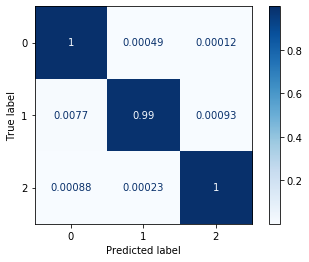

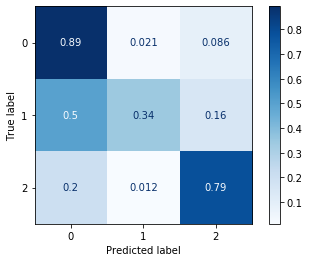

In [91]:
gbte = {'name' : 'gbte',
      'model' : plgbte,
      'grid' : gb_grid
      }

gbte_results = run_model(gbte, X)
gbte_results

In [96]:
pickle_save(gbte_results, 'gbte')

### SVC

In [93]:
plsvc = PL([('ohe', OHE(handle_unknown='ignore')),
         ('svc', SVC(random_state=22))
         ])
plsvcte = PL([('te', PW(TE())),
         ('svc', SVC(random_state=22))
         ])
svc_grid = {'svc__C' : [50, 100, 500],
           'svc__kernel' : ['poly'],
#            'svc__gamma' : ['scale', 'auto'],
           'svc__class_weight' : [None],
#            'svc__init' : ['dtc', None],
            'svc__coef0' : [0, 1, 10]
            }
svc = {'name' : 'svc',
      'model' : plsvc,
      'grid' : svc_grid
      }
svcte = {'name' : 'svcte',
      'model' : plsvcte,
      'grid' : svc_grid
      }

fitted
pred1
predt
acc
prec
rec
f1
svc train classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24272
           1       1.00      0.99      0.99      3226
           2       1.00      1.00      1.00     17052

    accuracy                           1.00     44550
   macro avg       1.00      1.00      1.00     44550
weighted avg       1.00      1.00      1.00     44550

pred2
svc test classification report
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      7987
           1       0.61      0.34      0.43      1091
           2       0.83      0.76      0.80      5772

    accuracy                           0.80     14850
   macro avg       0.74      0.66      0.69     14850
weighted avg       0.79      0.80      0.79     14850

Best Params:
 {'svc__C': 50, 'svc__class_weight': None, 'svc__coef0': 0, 'svc__kernel': 'poly'}


(GridSearchCV(cv=3,
              estimator=Pipeline(steps=[('ohe',
                                         OneHotEncoder(handle_unknown='ignore')),
                                        ('svc', SVC(random_state=22))]),
              n_jobs=-1,
              param_grid={'svc__C': [50, 100, 500], 'svc__class_weight': [None],
                          'svc__coef0': [0, 1, 10], 'svc__kernel': ['poly']},
              scoring='accuracy'),
 {'train_time': datetime.timedelta(0, 11903, 518076),
  'train': {'predict_time': datetime.timedelta(0, 989, 302493),
   'acc_train': 0.9985185185185185,
   'prec_train': 0.9985185185185185,
   'recall_train': 0.9985185185185185,
   'f1_train': 0.9985185185185185},
  'test': {'predict_time': datetime.timedelta(0, 311, 672092),
   'acc_test': 0.7998653198653198,
   'prec_test': 0.7998653198653198,
   'recall_test': 0.7998653198653198,
   'f1_test': 0.7998653198653198}})

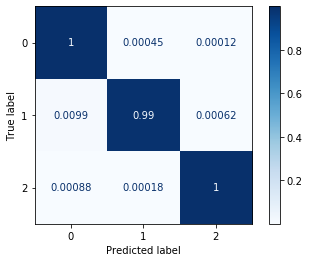

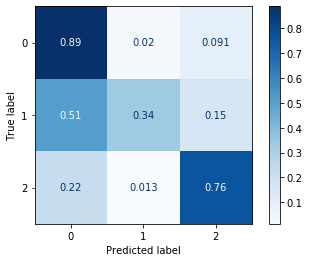

In [97]:
svc_result = run_model(svc, X=group(X, z=5))
svc_result

In [98]:
pickle_save(svc_result, 'svc')

In [ ]:
svcte_result = run_model(svcte, X)

In [ ]:
pickle_save(svcte_result, 'svcte')

### XGBoost

In [8]:
plxgb = PL([('ohe', OHE(handle_unknown='ignore')),
         ('xgb', XGB(seed=22))
         ])
plxgbte = PL([('te', PW(TE())),
         ('xgb', XGB(seed=22))
         ])
xgb_grid = {#'xgb__eta' : [0.1, 0.3, 0.6],
#             'xgb__max_depth' : [3, 6, 10],
#             'xgb__subsample' : [0.7, 1],
#             'xgb__colsample_bytree' : [1, 0.8],
#             'xgb__colsample_bynode' : [1, 0.8],
#             'xgb__lambda' : [1, 5, 10],
#             'xgb__alpha' : [0, 1, 5],
#             'xgb__gamma' : [0, 1, 5],
#             'xgb__tree_method' : ['auto', 'gpu_hist'],
#             'xgb__deterministic_histogram' : [False],
#             'xgb__num_parallel_tree' : [1, 10, 40]

            }
xgb = {'name' : 'xgb',
      'model' : plxgb,
      'grid' : xgb_grid
      }
xgbte = {'name' : 'xgbte',
      'model' : plxgbte,
      'grid' : xgb_grid
      }

fitted
pred1
predt
acc
prec
rec
f1
xgb train classification report
               precision    recall  f1-score   support

           0       0.71      0.94      0.81     24272
           1       0.70      0.08      0.15      3226
           2       0.85      0.59      0.70     17052

    accuracy                           0.75     44550
   macro avg       0.75      0.54      0.55     44550
weighted avg       0.76      0.75      0.72     44550

pred2
xgb test classification report
               precision    recall  f1-score   support

           0       0.70      0.94      0.80      7987
           1       0.72      0.09      0.16      1091
           2       0.85      0.59      0.70      5772

    accuracy                           0.74     14850
   macro avg       0.76      0.54      0.55     14850
weighted avg       0.76      0.74      0.71     14850

Best Params:
 {}


(GridSearchCV(cv=3,
              estimator=Pipeline(steps=[('ohe',
                                         OneHotEncoder(handle_unknown='ignore')),
                                        ('xgb', XGBClassifier(seed=22))]),
              n_jobs=-1, param_grid={}, scoring='accuracy'),
 {'train_time': datetime.timedelta(0, 1612, 262038),
  'train': {'predict_time': datetime.timedelta(0, 1, 988681),
   'acc_train': 0.7452525252525253,
   'prec_train': 0.7452525252525253,
   'recall_train': 0.7452525252525253,
   'f1_train': 0.7452525252525253},
  'test': {'predict_time': datetime.timedelta(0, 1, 9302),
   'acc_test': 0.7412794612794613,
   'prec_test': 0.7412794612794613,
   'recall_test': 0.7412794612794613,
   'f1_test': 0.7412794612794614}})

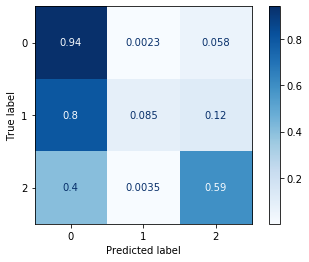

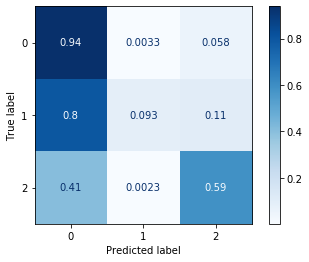

In [9]:
xgb_result = run_model(xgb, X=group(X, z=5))
xgb_result

In [10]:
pickle_save(xgb_result, 'xgb')

fitted
pred1
predt
acc
prec
rec
f1
xgbte train classification report
               precision    recall  f1-score   support

           0       0.72      0.93      0.81     24272
           1       0.65      0.13      0.21      3226
           2       0.83      0.61      0.71     17052

    accuracy                           0.75     44550
   macro avg       0.73      0.56      0.58     44550
weighted avg       0.76      0.75      0.73     44550

pred2
xgbte test classification report
               precision    recall  f1-score   support

           0       0.71      0.92      0.80      7987
           1       0.70      0.13      0.22      1091
           2       0.83      0.61      0.71      5772

    accuracy                           0.74     14850
   macro avg       0.75      0.56      0.58     14850
weighted avg       0.76      0.74      0.72     14850

Best Params:
 {}


(GridSearchCV(cv=3,
              estimator=Pipeline(steps=[('te',
                                         PolynomialWrapper(feature_encoder=TargetEncoder())),
                                        ('xgb', XGBClassifier(seed=22))]),
              n_jobs=-1, param_grid={}, scoring='accuracy'),
 {'train_time': datetime.timedelta(0, 1420, 818347),
  'train': {'predict_time': datetime.timedelta(0, 2, 911215),
   'acc_train': 0.7492929292929293,
   'prec_train': 0.7492929292929293,
   'recall_train': 0.7492929292929293,
   'f1_train': 0.7492929292929293},
  'test': {'predict_time': datetime.timedelta(0, 1, 292543),
   'acc_test': 0.7447138047138047,
   'prec_test': 0.7447138047138047,
   'recall_test': 0.7447138047138047,
   'f1_test': 0.7447138047138047}})

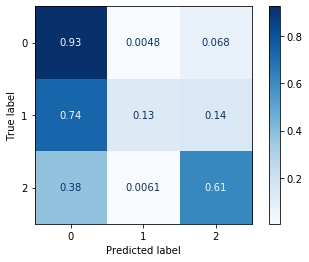

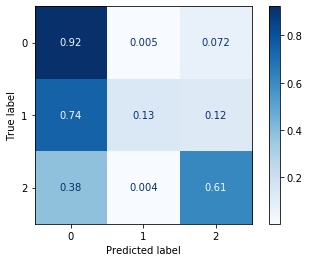

In [11]:
xgbte_result = run_model(xgbte, X)
xgbte_result

In [ ]:
pickle_save(xgbte_result, 'xgbte')

### CatBoost

In [40]:
X.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'yrs_operation', 'yr_recorded', 'day_recorded',
       'lga2'],
      dtype='object')

In [41]:
#Hyperparameters tuned: task_type, l2_leaf_reg, depth, rsm, iterations, bagging_temperature, random_strength, auto_class_weights
data = pd.read_csv('data/cleaned.csv')
X = data.drop('status_group', axis=1)
X_train, X_test, y_train, y_test = TTS(X, y, random_state=22)
cbc = CBC(random_seed=22, task_type='CPU', early_stopping_rounds=100, 
          l2_leaf_reg=1, depth=12, iterations=2500, rsm=0.6)
cbc.fit(X_train, y_train, cat_features=X.select_dtypes('object').columns, 
        eval_set=(X_test, y_test))

print(cbc.score(X_train, y_train), '---------------------------------------')
print(cbc.score(X_test, y_test), '-----------------------------------------')

0:	learn: 1.0722889	test: 1.0725177	best: 1.0725177 (0)	total: 7.19s	remaining: 4h 59m 31s
1:	learn: 1.0477858	test: 1.0479433	best: 1.0479433 (1)	total: 13.7s	remaining: 4h 44m 10s
2:	learn: 1.0246777	test: 1.0250730	best: 1.0250730 (2)	total: 20.9s	remaining: 4h 50m 8s
3:	learn: 1.0025395	test: 1.0033247	best: 1.0033247 (3)	total: 27.7s	remaining: 4h 48m 29s
4:	learn: 0.9820623	test: 0.9828442	best: 0.9828442 (4)	total: 33.8s	remaining: 4h 41m 12s
5:	learn: 0.9624939	test: 0.9633775	best: 0.9633775 (5)	total: 41.4s	remaining: 4h 46m 56s
6:	learn: 0.9447281	test: 0.9458470	best: 0.9458470 (6)	total: 48.2s	remaining: 4h 45m 55s
7:	learn: 0.9273787	test: 0.9288060	best: 0.9288060 (7)	total: 54.7s	remaining: 4h 43m 52s
8:	learn: 0.9114133	test: 0.9130540	best: 0.9130540 (8)	total: 1m 2s	remaining: 4h 49m 28s
9:	learn: 0.8958078	test: 0.8981437	best: 0.8981437 (9)	total: 1m 10s	remaining: 4h 54m 30s
10:	learn: 0.8812935	test: 0.8839996	best: 0.8839996 (10)	total: 1m 17s	remaining: 4h 52m 

88:	learn: 0.5212903	test: 0.5489462	best: 0.5489462 (88)	total: 10m 18s	remaining: 4h 39m 16s
89:	learn: 0.5198409	test: 0.5478549	best: 0.5478549 (89)	total: 10m 25s	remaining: 4h 39m 2s
90:	learn: 0.5181986	test: 0.5469291	best: 0.5469291 (90)	total: 10m 32s	remaining: 4h 39m 6s
91:	learn: 0.5170171	test: 0.5461945	best: 0.5461945 (91)	total: 10m 39s	remaining: 4h 39m 6s
92:	learn: 0.5156173	test: 0.5450535	best: 0.5450535 (92)	total: 10m 45s	remaining: 4h 38m 38s
93:	learn: 0.5142976	test: 0.5440909	best: 0.5440909 (93)	total: 10m 52s	remaining: 4h 38m 25s
94:	learn: 0.5128981	test: 0.5431733	best: 0.5431733 (94)	total: 10m 59s	remaining: 4h 38m 23s
95:	learn: 0.5115816	test: 0.5421335	best: 0.5421335 (95)	total: 11m 6s	remaining: 4h 38m 8s
96:	learn: 0.5104668	test: 0.5411940	best: 0.5411940 (96)	total: 11m 12s	remaining: 4h 37m 42s
97:	learn: 0.5091740	test: 0.5403113	best: 0.5403113 (97)	total: 11m 18s	remaining: 4h 37m 1s
98:	learn: 0.5081917	test: 0.5395006	best: 0.5395006 (98

174:	learn: 0.4371379	test: 0.5032533	best: 0.5032533 (174)	total: 20m 11s	remaining: 4h 28m 10s
175:	learn: 0.4366586	test: 0.5030001	best: 0.5030001 (175)	total: 20m 17s	remaining: 4h 28m
176:	learn: 0.4361154	test: 0.5027216	best: 0.5027216 (176)	total: 20m 25s	remaining: 4h 27m 59s
177:	learn: 0.4358956	test: 0.5026020	best: 0.5026020 (177)	total: 20m 32s	remaining: 4h 27m 52s
178:	learn: 0.4352885	test: 0.5024029	best: 0.5024029 (178)	total: 20m 38s	remaining: 4h 27m 40s
179:	learn: 0.4341210	test: 0.5020811	best: 0.5020811 (179)	total: 20m 45s	remaining: 4h 27m 38s
180:	learn: 0.4336444	test: 0.5018208	best: 0.5018208 (180)	total: 20m 52s	remaining: 4h 27m 26s
181:	learn: 0.4329307	test: 0.5016043	best: 0.5016043 (181)	total: 21m	remaining: 4h 27m 28s
182:	learn: 0.4325464	test: 0.5014074	best: 0.5014074 (182)	total: 21m 6s	remaining: 4h 27m 18s
183:	learn: 0.4319077	test: 0.5011915	best: 0.5011915 (183)	total: 21m 13s	remaining: 4h 27m 14s
184:	learn: 0.4316637	test: 0.5010705	b

259:	learn: 0.3911488	test: 0.4894060	best: 0.4894060 (259)	total: 29m 54s	remaining: 4h 17m 37s
260:	learn: 0.3909191	test: 0.4893331	best: 0.4893331 (260)	total: 30m	remaining: 4h 17m 28s
261:	learn: 0.3906977	test: 0.4892442	best: 0.4892442 (261)	total: 30m 7s	remaining: 4h 17m 16s
262:	learn: 0.3900576	test: 0.4891036	best: 0.4891036 (262)	total: 30m 13s	remaining: 4h 17m 8s
263:	learn: 0.3894742	test: 0.4888931	best: 0.4888931 (263)	total: 30m 20s	remaining: 4h 16m 55s
264:	learn: 0.3890048	test: 0.4887662	best: 0.4887662 (264)	total: 30m 27s	remaining: 4h 16m 53s
265:	learn: 0.3882452	test: 0.4886475	best: 0.4886475 (265)	total: 30m 35s	remaining: 4h 16m 51s
266:	learn: 0.3876388	test: 0.4885000	best: 0.4885000 (266)	total: 30m 42s	remaining: 4h 16m 45s
267:	learn: 0.3874180	test: 0.4884161	best: 0.4884161 (267)	total: 30m 48s	remaining: 4h 16m 32s
268:	learn: 0.3870309	test: 0.4883612	best: 0.4883612 (268)	total: 30m 55s	remaining: 4h 16m 31s
269:	learn: 0.3865641	test: 0.488233

344:	learn: 0.3577443	test: 0.4824005	best: 0.4824005 (344)	total: 41m 20s	remaining: 4h 18m 17s
345:	learn: 0.3572288	test: 0.4822814	best: 0.4822814 (345)	total: 41m 27s	remaining: 4h 18m 6s
346:	learn: 0.3570033	test: 0.4822760	best: 0.4822760 (346)	total: 41m 35s	remaining: 4h 18m
347:	learn: 0.3564165	test: 0.4821911	best: 0.4821911 (347)	total: 41m 42s	remaining: 4h 17m 56s
348:	learn: 0.3561331	test: 0.4821495	best: 0.4821495 (348)	total: 41m 50s	remaining: 4h 17m 52s
349:	learn: 0.3558452	test: 0.4820941	best: 0.4820941 (349)	total: 41m 57s	remaining: 4h 17m 45s
350:	learn: 0.3557291	test: 0.4820727	best: 0.4820727 (350)	total: 42m 4s	remaining: 4h 17m 37s
351:	learn: 0.3552277	test: 0.4819922	best: 0.4819922 (351)	total: 42m 12s	remaining: 4h 17m 31s
352:	learn: 0.3548299	test: 0.4818635	best: 0.4818635 (352)	total: 42m 19s	remaining: 4h 17m 22s
353:	learn: 0.3544454	test: 0.4817664	best: 0.4817664 (353)	total: 42m 25s	remaining: 4h 17m 9s
354:	learn: 0.3539087	test: 0.4816931

430:	learn: 0.3274681	test: 0.4774941	best: 0.4774941 (430)	total: 51m 5s	remaining: 4h 5m 17s
431:	learn: 0.3271831	test: 0.4774224	best: 0.4774224 (431)	total: 51m 12s	remaining: 4h 5m 8s
432:	learn: 0.3268336	test: 0.4773649	best: 0.4773649 (432)	total: 51m 18s	remaining: 4h 4m 55s
433:	learn: 0.3262349	test: 0.4773180	best: 0.4773180 (433)	total: 51m 24s	remaining: 4h 4m 44s
434:	learn: 0.3258046	test: 0.4773275	best: 0.4773180 (433)	total: 51m 30s	remaining: 4h 4m 32s
435:	learn: 0.3256690	test: 0.4772958	best: 0.4772958 (435)	total: 51m 37s	remaining: 4h 4m 23s
436:	learn: 0.3250559	test: 0.4772243	best: 0.4772243 (436)	total: 51m 44s	remaining: 4h 4m 17s
437:	learn: 0.3248666	test: 0.4771992	best: 0.4771992 (437)	total: 51m 51s	remaining: 4h 4m 6s
438:	learn: 0.3246627	test: 0.4771727	best: 0.4771727 (438)	total: 51m 57s	remaining: 4h 3m 56s
439:	learn: 0.3243728	test: 0.4770816	best: 0.4770816 (439)	total: 52m 5s	remaining: 4h 3m 51s
440:	learn: 0.3239264	test: 0.4770519	best: 

516:	learn: 0.3022245	test: 0.4744179	best: 0.4744179 (516)	total: 1h 23s	remaining: 3h 51m 38s
517:	learn: 0.3019969	test: 0.4744149	best: 0.4744149 (517)	total: 1h 29s	remaining: 3h 51m 29s
518:	learn: 0.3017700	test: 0.4743860	best: 0.4743860 (518)	total: 1h 37s	remaining: 3h 51m 23s
519:	learn: 0.3016072	test: 0.4743377	best: 0.4743377 (519)	total: 1h 43s	remaining: 3h 51m 11s
520:	learn: 0.3014329	test: 0.4743021	best: 0.4743021 (520)	total: 1h 49s	remaining: 3h 51m 4s
521:	learn: 0.3011461	test: 0.4742914	best: 0.4742914 (521)	total: 1h 57s	remaining: 3h 50m 59s
522:	learn: 0.3006707	test: 0.4742743	best: 0.4742743 (522)	total: 1h 1m 3s	remaining: 3h 50m 47s
523:	learn: 0.3002989	test: 0.4742378	best: 0.4742378 (523)	total: 1h 1m 10s	remaining: 3h 50m 39s
524:	learn: 0.2999672	test: 0.4742143	best: 0.4742143 (524)	total: 1h 1m 17s	remaining: 3h 50m 33s
525:	learn: 0.2997344	test: 0.4741596	best: 0.4741596 (525)	total: 1h 1m 23s	remaining: 3h 50m 24s
526:	learn: 0.2992776	test: 0.

600:	learn: 0.2813457	test: 0.4725666	best: 0.4725666 (600)	total: 1h 9m 40s	remaining: 3h 40m 9s
601:	learn: 0.2809781	test: 0.4725754	best: 0.4725666 (600)	total: 1h 9m 47s	remaining: 3h 40m 1s
602:	learn: 0.2808343	test: 0.4725943	best: 0.4725666 (600)	total: 1h 9m 53s	remaining: 3h 39m 52s
603:	learn: 0.2806083	test: 0.4725561	best: 0.4725561 (603)	total: 1h 10m 1s	remaining: 3h 39m 47s
604:	learn: 0.2805219	test: 0.4725388	best: 0.4725388 (604)	total: 1h 10m 6s	remaining: 3h 39m 34s
605:	learn: 0.2801931	test: 0.4725441	best: 0.4725388 (604)	total: 1h 10m 13s	remaining: 3h 39m 28s
606:	learn: 0.2801451	test: 0.4725382	best: 0.4725382 (606)	total: 1h 10m 19s	remaining: 3h 39m 20s
607:	learn: 0.2797038	test: 0.4725002	best: 0.4725002 (607)	total: 1h 10m 27s	remaining: 3h 39m 13s
608:	learn: 0.2794483	test: 0.4724814	best: 0.4724814 (608)	total: 1h 10m 31s	remaining: 3h 38m 58s
609:	learn: 0.2791069	test: 0.4724290	best: 0.4724290 (609)	total: 1h 10m 37s	remaining: 3h 38m 48s
610:	le

683:	learn: 0.2617892	test: 0.4715454	best: 0.4714925 (678)	total: 1h 18m 39s	remaining: 3h 28m 50s
684:	learn: 0.2614622	test: 0.4715274	best: 0.4714925 (678)	total: 1h 18m 46s	remaining: 3h 28m 44s
685:	learn: 0.2611973	test: 0.4715004	best: 0.4714925 (678)	total: 1h 18m 52s	remaining: 3h 28m 34s
686:	learn: 0.2609506	test: 0.4714884	best: 0.4714884 (686)	total: 1h 18m 59s	remaining: 3h 28m 28s
687:	learn: 0.2608004	test: 0.4714597	best: 0.4714597 (687)	total: 1h 19m 6s	remaining: 3h 28m 21s
688:	learn: 0.2605512	test: 0.4714531	best: 0.4714531 (688)	total: 1h 19m 13s	remaining: 3h 28m 15s
689:	learn: 0.2603617	test: 0.4714263	best: 0.4714263 (689)	total: 1h 19m 19s	remaining: 3h 28m 6s
690:	learn: 0.2600864	test: 0.4713607	best: 0.4713607 (690)	total: 1h 19m 27s	remaining: 3h 28m
691:	learn: 0.2596630	test: 0.4713553	best: 0.4713553 (691)	total: 1h 19m 32s	remaining: 3h 27m 50s
692:	learn: 0.2592657	test: 0.4713428	best: 0.4713428 (692)	total: 1h 19m 40s	remaining: 3h 27m 44s
693:	l

766:	learn: 0.2429301	test: 0.4710795	best: 0.4710605 (762)	total: 1h 27m 50s	remaining: 3h 18m 28s
767:	learn: 0.2427975	test: 0.4710498	best: 0.4710498 (767)	total: 1h 27m 56s	remaining: 3h 18m 20s
768:	learn: 0.2426761	test: 0.4710394	best: 0.4710394 (768)	total: 1h 28m 3s	remaining: 3h 18m 12s
769:	learn: 0.2425785	test: 0.4710366	best: 0.4710366 (769)	total: 1h 28m 9s	remaining: 3h 18m 4s
770:	learn: 0.2425276	test: 0.4710308	best: 0.4710308 (770)	total: 1h 28m 15s	remaining: 3h 17m 56s
771:	learn: 0.2424637	test: 0.4710350	best: 0.4710308 (770)	total: 1h 28m 21s	remaining: 3h 17m 47s
772:	learn: 0.2419883	test: 0.4710421	best: 0.4710308 (770)	total: 1h 28m 28s	remaining: 3h 17m 39s
773:	learn: 0.2417455	test: 0.4710229	best: 0.4710229 (773)	total: 1h 28m 34s	remaining: 3h 17m 31s
774:	learn: 0.2416419	test: 0.4710231	best: 0.4710229 (773)	total: 1h 28m 41s	remaining: 3h 17m 25s
775:	learn: 0.2414534	test: 0.4710430	best: 0.4710229 (773)	total: 1h 28m 48s	remaining: 3h 17m 17s
776

849:	learn: 0.2278914	test: 0.4707966	best: 0.4707630 (833)	total: 1h 37m 4s	remaining: 3h 8m 26s
850:	learn: 0.2277708	test: 0.4707875	best: 0.4707630 (833)	total: 1h 37m 11s	remaining: 3h 8m 20s
851:	learn: 0.2275992	test: 0.4708215	best: 0.4707630 (833)	total: 1h 37m 18s	remaining: 3h 8m 13s
852:	learn: 0.2274743	test: 0.4708138	best: 0.4707630 (833)	total: 1h 37m 25s	remaining: 3h 8m 7s
853:	learn: 0.2272783	test: 0.4708064	best: 0.4707630 (833)	total: 1h 37m 32s	remaining: 3h 8m
854:	learn: 0.2271746	test: 0.4707856	best: 0.4707630 (833)	total: 1h 37m 39s	remaining: 3h 7m 54s
855:	learn: 0.2270313	test: 0.4707848	best: 0.4707630 (833)	total: 1h 37m 45s	remaining: 3h 7m 45s
856:	learn: 0.2269262	test: 0.4708056	best: 0.4707630 (833)	total: 1h 37m 53s	remaining: 3h 7m 39s
857:	learn: 0.2267317	test: 0.4708028	best: 0.4707630 (833)	total: 1h 38m	remaining: 3h 7m 34s
858:	learn: 0.2266478	test: 0.4707941	best: 0.4707630 (833)	total: 1h 38m 8s	remaining: 3h 7m 28s
859:	learn: 0.2262498

933:	learn: 0.2131011	test: 0.4707806	best: 0.4707577 (928)	total: 1h 46m 32s	remaining: 2h 58m 37s
934:	learn: 0.2129556	test: 0.4707911	best: 0.4707577 (928)	total: 1h 46m 39s	remaining: 2h 58m 30s
935:	learn: 0.2128384	test: 0.4708263	best: 0.4707577 (928)	total: 1h 46m 46s	remaining: 2h 58m 24s
936:	learn: 0.2127358	test: 0.4708364	best: 0.4707577 (928)	total: 1h 46m 53s	remaining: 2h 58m 17s
937:	learn: 0.2125599	test: 0.4708296	best: 0.4707577 (928)	total: 1h 46m 59s	remaining: 2h 58m 9s
938:	learn: 0.2123913	test: 0.4708269	best: 0.4707577 (928)	total: 1h 47m 7s	remaining: 2h 58m 4s
939:	learn: 0.2122863	test: 0.4708132	best: 0.4707577 (928)	total: 1h 47m 14s	remaining: 2h 57m 58s
940:	learn: 0.2119704	test: 0.4708331	best: 0.4707577 (928)	total: 1h 47m 21s	remaining: 2h 57m 52s
941:	learn: 0.2117134	test: 0.4708247	best: 0.4707577 (928)	total: 1h 47m 27s	remaining: 2h 57m 44s
942:	learn: 0.2115390	test: 0.4707757	best: 0.4707577 (928)	total: 1h 47m 33s	remaining: 2h 57m 35s
943

1016:	learn: 0.1987923	test: 0.4717348	best: 0.4707440 (948)	total: 1h 55m 53s	remaining: 2h 48m 59s
1017:	learn: 0.1986637	test: 0.4717671	best: 0.4707440 (948)	total: 1h 55m 58s	remaining: 2h 48m 50s
1018:	learn: 0.1984136	test: 0.4718024	best: 0.4707440 (948)	total: 1h 56m 5s	remaining: 2h 48m 43s
1019:	learn: 0.1981510	test: 0.4718067	best: 0.4707440 (948)	total: 1h 56m 11s	remaining: 2h 48m 36s
1020:	learn: 0.1980537	test: 0.4717950	best: 0.4707440 (948)	total: 1h 56m 18s	remaining: 2h 48m 29s
1021:	learn: 0.1978931	test: 0.4718149	best: 0.4707440 (948)	total: 1h 56m 26s	remaining: 2h 48m 23s
1022:	learn: 0.1978077	test: 0.4718069	best: 0.4707440 (948)	total: 1h 56m 33s	remaining: 2h 48m 16s
1023:	learn: 0.1977470	test: 0.4717926	best: 0.4707440 (948)	total: 1h 56m 39s	remaining: 2h 48m 9s
1024:	learn: 0.1976322	test: 0.4717778	best: 0.4707440 (948)	total: 1h 56m 46s	remaining: 2h 48m 1s
1025:	learn: 0.1975394	test: 0.4718009	best: 0.4707440 (948)	total: 1h 56m 51s	remaining: 2h 4

In [ ]:
a, b = zip(*sorted(zip(cbc.feature_importances_, X.columns)))
plt.figure(figsize=(6,8))
plt.barh(b, a)

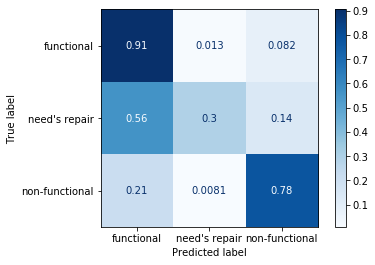

In [46]:
X_train, X_test, y_train, y_test = TTS(X, y, random_state=22)
PCM(cbc, X_test, y_test, normalize='true', cmap='Blues', 
    display_labels=['functional', "need's repair", 'non-functional'])

Results: Same result for different group sizes (all, 500, 200, 100, 50, 20), will no longer try such large sizes with OHE

In [43]:
pickle_save(cbc, 'cbc')

<BarContainer object of 40 artists>

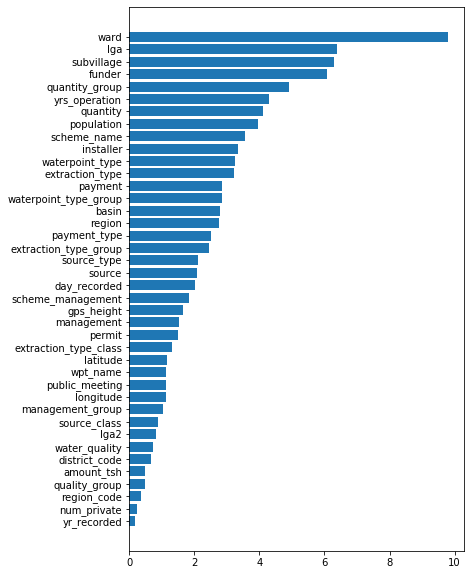

In [56]:
a, b = zip(*sorted(list(zip(cbc.feature_importances_, X.columns))))
plt.figure(figsize=(6,10))
plt.barh(b, a)

## Conclusion

Best model was CatBoost with a prediction of 81% accuracy on the test set    
      
The most important features were about the well's location. It makes sense that wells fed by the same source would dry up together
However there was also some association between location and date recorded so wells near each other are more likely to be recorded in the same wet or dry season

If the whole project were to be done again I would ask of the data collectors to include seasonally functional as separate class
I would also ask them, if possible, to find the year a well became non-functional, which could turn this into more of a regression problem -how long does the well pump last?

## Future Work

With more time I’d like to:    
Try using SMOTE on the smallest class    
-Though I suspect it would have been detrimental to the overall accuracy    
    
Carry out further hyperparameter tuning in XGBoost and the Support Vector Classifier     
Also, having all these models, I’d like to try using bagging methods with them to create an ensemble    
    
With more time still:    
I’d go back and try using CatBoost to impute missing values in the original data    
And also try H2O as another algorithm that can handle categories     


I'd also move functions to separate file